**Overview**<br>
<a href="https://archive.ics.uci.edu/ml/datasets/online+retail">Online retail is a transnational data set</a> which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

The steps are broadly:
1. Read and understand the data
2. Clean the data
3. Prepare the data for modelling
4. Ouliers Treatment
5. Modelling
6. Final analysis and recomendations

# 1. Import Libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
#connect with google drive
# from google.colab import files

In [3]:
# import io
# uploaded = files.upload()

In [4]:
#identify the encoding type of CSV
# install the chardet library
#!pip install chardet

# import the chardet library
# import chardet 

# use the detect method to find the encoding
# 'rb' means read in the file as binary
# with open("Online_Retail.csv", 'rb') as file:
#     print(chardet.detect(file.read()))

In [40]:
retails_df = pd.read_csv("Online_Retail.csv", encoding='ISO-8859-1')

In [41]:
retails_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [42]:
#get the shape of dataset
retails_df.shape

(541909, 8)

In [43]:
#get the info of dataset
retails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 22.7+ MB


# 2. Check Missing Values

In [44]:
round(retails_df.isnull().sum()/len(retails_df)*100,2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

**25%** values are missing in **CustomerID** column but we can't drop that column because it is important. So we will Drop the missing values rows.

## Drop Missing Values

In [45]:
retails_df.dropna(axis=0, inplace=True)

In [46]:
#check the shape now
retails_df.shape

(406829, 8)

In [47]:
#check the info of dataset
retails_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 20.2+ MB


# 3. Preprocess The Data

Clustering works on :RFM


1.   R: Recency : how recently the orders doing
2.   F: Freqency: No of Transactions
3.   M: Monetary: Total amount of Transactions




In [48]:
#create amount column i.e. quantity * unitprice
retails_df['amount'] = retails_df['Quantity'] * retails_df['UnitPrice']

In [49]:
retails_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [50]:
#we can see that InvoiceDate is object we need to convert into DateTime object
retails_df['InvoiceDate'] = pd.to_datetime(retails_df['InvoiceDate'], format= '%d-%m-%Y %H:%M')

In [51]:
#create new column diff from current date to order date
#get the max date
max_date = max(retails_df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [52]:
retails_df['diff'] = max_date - retails_df['InvoiceDate']

In [53]:
retails_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [54]:
retails_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype          
---  ------       --------------   -----          
 0   InvoiceNo    406829 non-null  object         
 1   StockCode    406829 non-null  object         
 2   Description  406829 non-null  object         
 3   Quantity     406829 non-null  int64          
 4   InvoiceDate  406829 non-null  datetime64[ns] 
 5   UnitPrice    406829 non-null  float64        
 6   CustomerID   406829 non-null  float64        
 7   Country      406829 non-null  object         
 8   amount       406829 non-null  float64        
 9   diff         406829 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4), timedelta64[ns](1)
memory usage: 27.9+ MB


In [55]:
#Get the total amount of orders on the basis of customerid ie. Monetary
grouped_df = retails_df.groupby('CustomerID')['amount'].sum()
grouped_df = grouped_df.reset_index()
grouped_df.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [56]:
#get the total no of InvoiceNo on the basis of customerid i.e. Freaqency
frequency_df = retails_df.groupby('CustomerID')['InvoiceNo'].count()
frequency_df = frequency_df.reset_index()
frequency_df.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [57]:
#Merge this 2 dfs 
grouped_df = pd.merge(grouped_df, frequency_df, on='CustomerID', how='inner')

In [58]:
grouped_df.head()

,CustomerID,amount,InvoiceNo
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [59]:
#change cloumn names
grouped_df.columns = ['CustomerID', 'amount', 'frequency']
grouped_df.head()

,CustomerID,amount,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [60]:
#create a df with minimum order range on the basis of customerid ie. recency
recency_df = retails_df.groupby('CustomerID')['diff'].min()
recency_df = recency_df.reset_index()
recency_df.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [61]:
# extract only days from diff column
recency_df['diff'] = recency_df['diff'].dt.days
recency_df.head()

,CustomerID,diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [62]:
#merge with main df
grouped_df = pd.merge(grouped_df, recency_df, on='CustomerID', how="inner")
grouped_df.head()

,CustomerID,amount,frequency,diff
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [63]:
grouped_df.columns= ['CustomerID', 'amount', 'frequency', 'recency']
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


# 4. Outlier Treatments

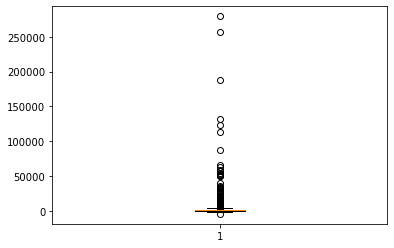

In [64]:
plt.boxplot(grouped_df['amount'])
plt.show()

Clearly we can see that there are lot of ouliers might be they are hifg ranged customers. On the basis of domain knowledge we can keep them if required by client

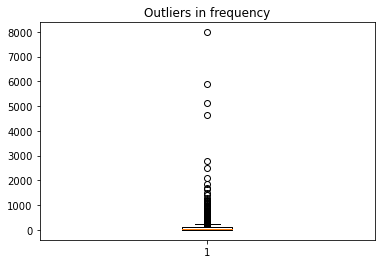

In [65]:
plt.title('Outliers in frequency')
plt.boxplot(grouped_df['frequency'])
plt.show()

Clearly we can see that there are lot of ouliers might be they are high ranged customers. On the basis of domain knowledge we can keep them if required by client

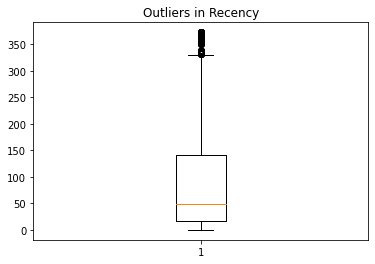

In [66]:
plt.title('Outliers in Recency')
plt.boxplot(grouped_df['recency'])
plt.show()

There are a lot of customers those didn't make any transaction in approx 335 days.

### Remove Statistical Outliers

In [67]:
#remove ouliers from amount
Q1 = grouped_df.amount.quantile(0.05)
Q3 = grouped_df.amount.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.amount >= Q1 - 1.5*IQR) & (grouped_df.amount <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = grouped_df.recency.quantile(0.05)
Q3 = grouped_df.recency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.recency >= Q1 - 1.5*IQR) & (grouped_df.recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = grouped_df.frequency.quantile(0.05)
Q3 = grouped_df.frequency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.frequency >= Q1 - 1.5*IQR) & (grouped_df.frequency <= Q3 + 1.5*IQR)]

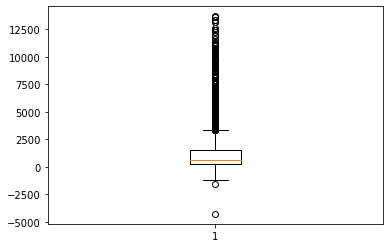

In [68]:
plt.boxplot(grouped_df['amount'])
plt.show()

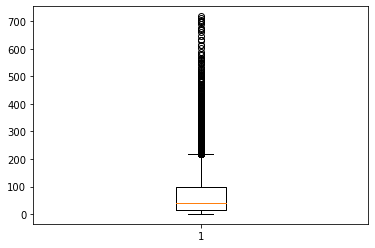

In [69]:
plt.boxplot(grouped_df['frequency'])
plt.show()

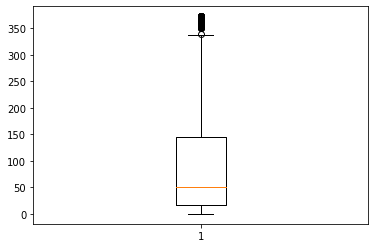

In [70]:
plt.boxplot(grouped_df['recency'])
plt.show()

### Rescalling the data

In [71]:
rfm_df = grouped_df[['amount', 'frequency', 'recency']]
rfm_df.head()

,amount,frequency,recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309


In [72]:
scaler = StandardScaler() #Instantiate
rfm_scaled_df = scaler.fit_transform(rfm_df) # Fit and transform
rfm_scaled_df.shape

(4293, 3)

In [73]:
rfm_scaled_df

array([[-0.72373821, -0.75288754,  2.30161144],
       [ 1.73161722,  1.04246665, -0.90646561],
       [ 0.30012791, -0.46363604, -0.18365813],
       ...,
       [-0.67769602, -0.70301659,  0.86589794],
       [-0.6231313 , -0.64317145, -0.84705678],
       [ 0.32293822, -0.07464263, -0.50050524]])

In [74]:
#covert series into dataframe

scale_df = pd.DataFrame(rfm_scaled_df)
scale_df.columns = ['amount', 'frequency', 'recency']
scale_df.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


# 5. Modelling

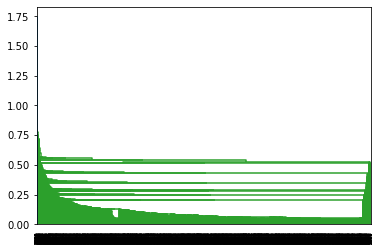

In [75]:
#use Single linkage
hierarical_df = linkage(scale_df,method='single', metric='euclidean')
dendrogram(hierarical_df)
plt.show()

#### As we can see after using Single linkage no useful insight getting because it is calculating minimum distance between clusters.

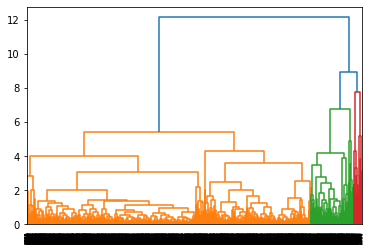

In [76]:
#use complete linkage
complete_df = linkage(scale_df, method='complete', metric='euclidean')
dendrogram(complete_df)
plt.show()

#### we will use 3 clusters for better interptation.

In [77]:
#use cut_tree method and reshape in series (10,) instead of (10,1)
cluster_labels = cut_tree(complete_df, n_clusters =3).reshape(-1,)
cluster_labels

array([0, 1, 0, ..., 0, 0, 0])

In [78]:
#merge with main grouped_df
grouped_df['cluster_labels'] = cluster_labels
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_labels
0,12346.0,0.00,2,325,0
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,0


# Visualize The Final Model

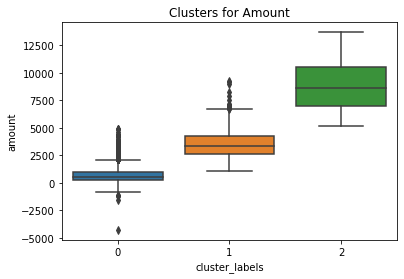

In [79]:
plt.title('Clusters for Amount')
sns.boxplot(x='cluster_labels', y='amount', data=grouped_df)
plt.show()

### Observations:

*   Cluster 2: High amount cutomers
*   Cluster 1: Low amount cutomers
*   Cluster 0: Medium amount cutomers



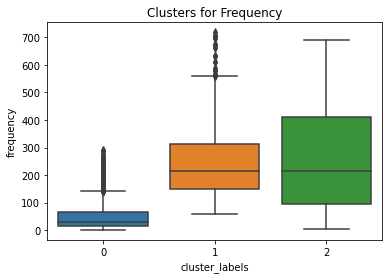

In [80]:
plt.title('Clusters for Frequency')
sns.boxplot(x='cluster_labels', y='frequency', data=grouped_df)
plt.show()

### Observations:

*   Cluster 2: High frequency cutomers
*   Cluster 1: Low frequency cutomers
*   Cluster 0: Medium frequency cutomers



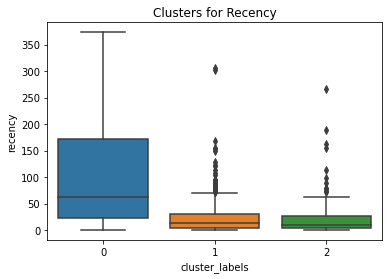

In [81]:
plt.title('Clusters for Recency')
sns.boxplot(x='cluster_labels', y='recency', data=grouped_df)
plt.show()

### Observations:
Recency is vice versa that Frequency and Amount. Because Active customers will be Those who have minimum gap between the transactions

*   Cluster 2: Highly active cutomers
*   Cluster 1: very less active cutomers as gap of no_of_days transaction is more that 180
*   Cluster 1: Averge active cutomers
